In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
matplotlib inline

In [3]:
promnt=pd.read_csv(r'C:\Users\Paul Fadayini\Desktop\titucodes\dataresources\procurement dataset.csv',  encoding = 'latin1')

In [4]:
promnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26486 entries, 0 to 26485
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Request Date      26485 non-null  object 
 1   RequestID         26485 non-null  object 
 2   Requester Name    26485 non-null  object 
 3   Approval Date     26485 non-null  object 
 4   Activity Name     8172 non-null   object 
 5   Category          26485 non-null  object 
 6   Item Description  26484 non-null  object 
 7   Justification     26485 non-null  object 
 8   Suggest Vendor    25200 non-null  object 
 9   Department        26485 non-null  object 
 10  Country           26485 non-null  object 
 11  Cost Centre       4825 non-null   object 
 12  Line Manager      26485 non-null  object 
 13  Budget Holder     26485 non-null  object 
 14  PBM               26485 non-null  object 
 15  Sourcing Manager  26485 non-null  object 
 16  Current Status    26485 non-null  object

# COST KPI

#1aTO CALCULATE THE TOTAL ESTIMATED BUDGET FOR 
ORDER REQUEST

In [5]:
total_estimated_budget=promnt['Estimated_Budget'].sum()
print(total_estimated_budget)

68946808348.387


1b THE CATEGORY WITH THE BIGGEST ESTIMATED BUDGET

In [6]:
#first categorize the budget by categories of products
Budget_by_cat=promnt.groupby(['Category'])['Estimated_Budget'].sum()
Budget_by_cat.head()

Category
Building                    3.811453e+09
Building Services           6.591663e+09
Car Expenses                6.096997e+09
Facilities Services         6.301118e+09
Finance Finance Services    1.915399e+08
Name: Estimated_Budget, dtype: float64

In [7]:
#then sort them in order from category with highest budget to lowest
Budget_by_cat.sort_values(ascending=False)

Category
Marketing & Trade               2.639549e+10
Building Services               6.591663e+09
Facilities Services             6.301118e+09
Car Expenses                    6.096997e+09
Building                        3.811453e+09
Production                      3.252505e+09
Other Consultancy Fees          3.177844e+09
Hr Professional Services        3.038240e+09
Office Services And Supplies    2.513403e+09
It Services & Equipment         2.330005e+09
Legal Services                  1.886431e+09
Other Hr Services               1.251217e+09
Logistic                        4.143157e+08
Travel                          4.022841e+08
Politics & Civic Affairs        3.579312e+08
Insurance                       3.572773e+08
Tax                             2.112156e+08
Finance Finance Services        1.915399e+08
Logistics                       1.505784e+08
Travel & Entertainment          1.392963e+08
Telecom                         6.191330e+07
Financial Services              1.408783e+07
N

In [8]:
#to check if that was right
value=Budget_by_cat.max()

In [9]:
print("Marketing & Trade is the Category with the highest budget of" + " " + str(value))

Marketing & Trade is the Category with the highest budget of 26395493350.03


<AxesSubplot:title={'center':'Estimated Budget Graph'}, xlabel='Category', ylabel='Estimated Budget'>

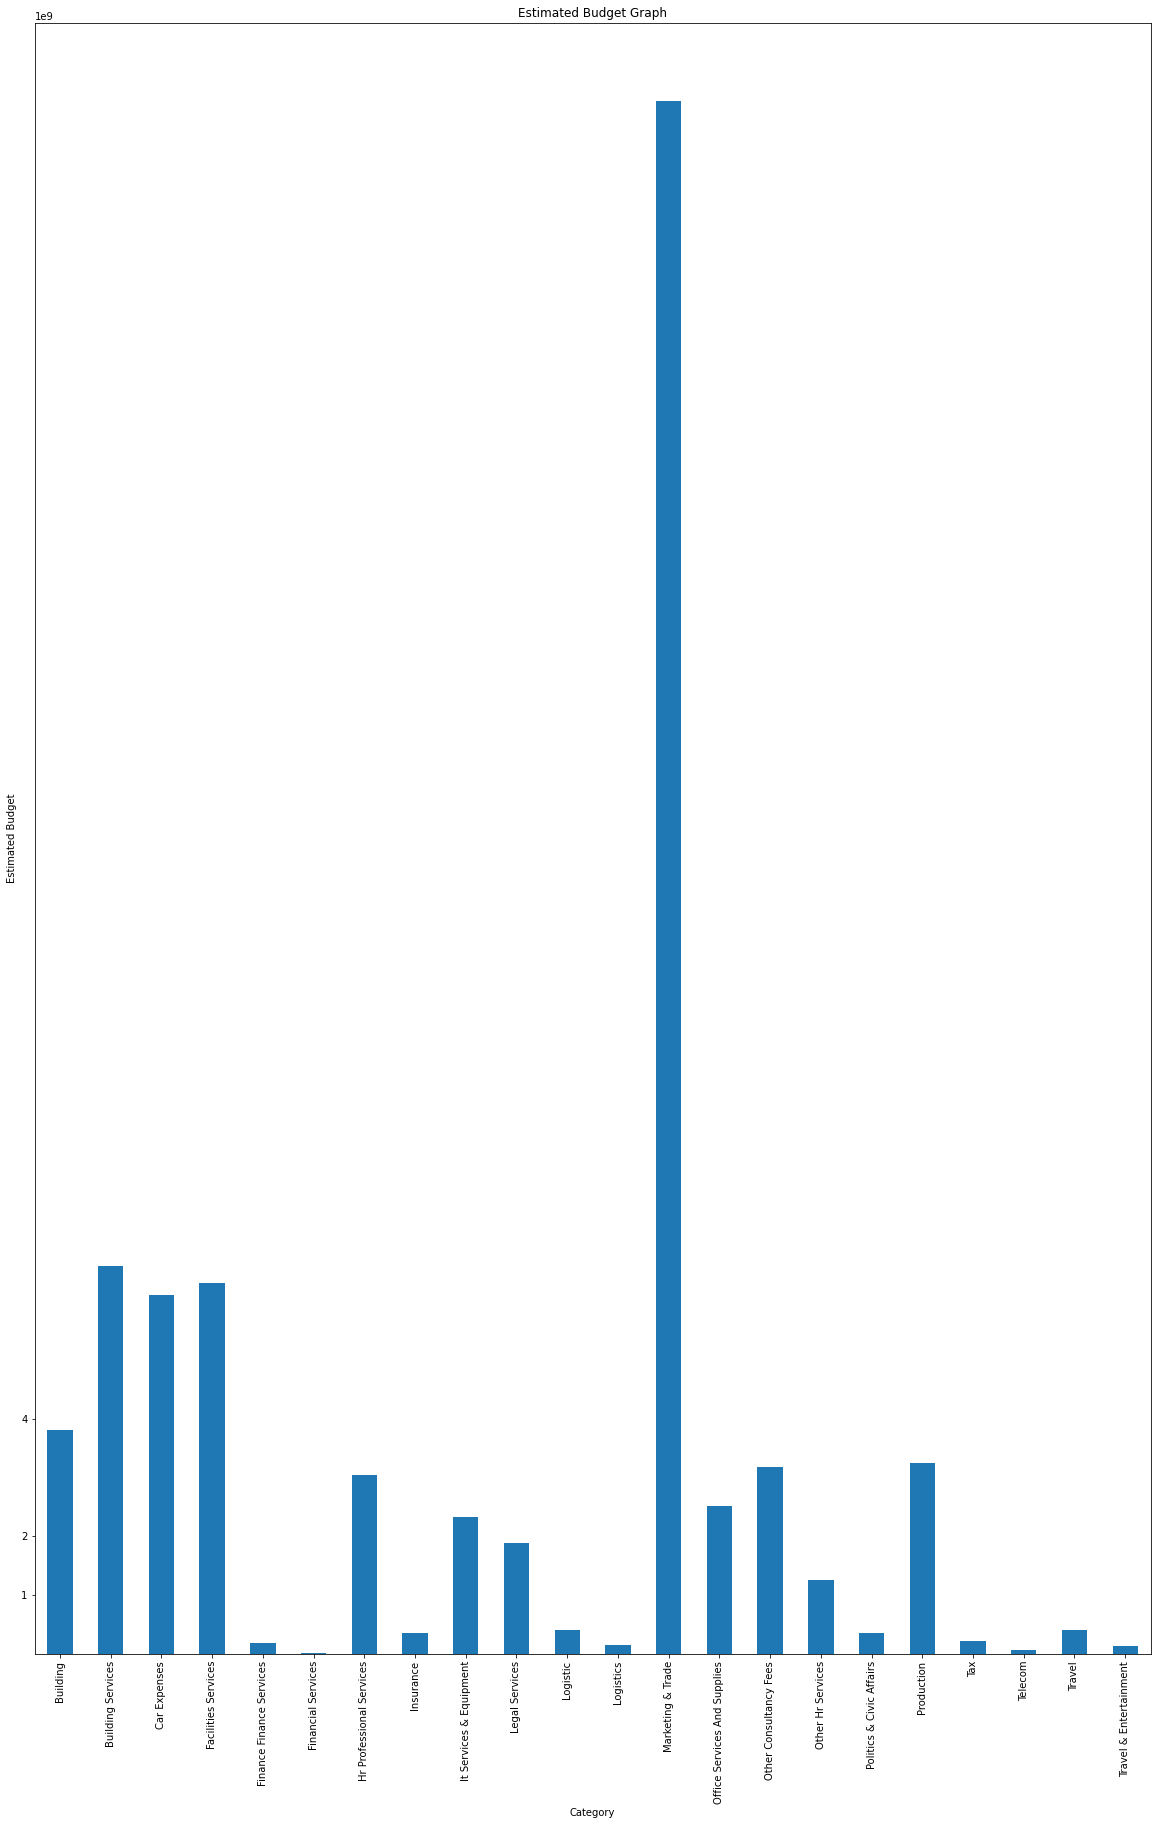

In [18]:
Budget_by_cat.plot(kind='bar',ylabel="Estimated Budget", title="Estimated Budget Graph", yticks=[1.0e+09,2.0e+09, 4.0e+09], figsize=(20,30))

array([[<AxesSubplot:title={'center':'Building'}>,
        <AxesSubplot:title={'center':'Building Services'}>,
        <AxesSubplot:title={'center':'Car Expenses'}>,
        <AxesSubplot:title={'center':'Facilities Services'}>,
        <AxesSubplot:title={'center':'Finance Finance Services'}>],
       [<AxesSubplot:title={'center':'Financial Services'}>,
        <AxesSubplot:title={'center':'Hr Professional Services'}>,
        <AxesSubplot:title={'center':'Insurance'}>,
        <AxesSubplot:title={'center':'It Services & Equipment'}>,
        <AxesSubplot:title={'center':'Legal Services'}>],
       [<AxesSubplot:title={'center':'Logistic'}>,
        <AxesSubplot:title={'center':'Logistics'}>,
        <AxesSubplot:title={'center':'Marketing & Trade'}>,
        <AxesSubplot:title={'center':'Office Services And Supplies'}>,
        <AxesSubplot:title={'center':'Other Consultancy Fees'}>],
       [<AxesSubplot:title={'center':'Other Hr Services'}>,
        <AxesSubplot:title={'center':'Po

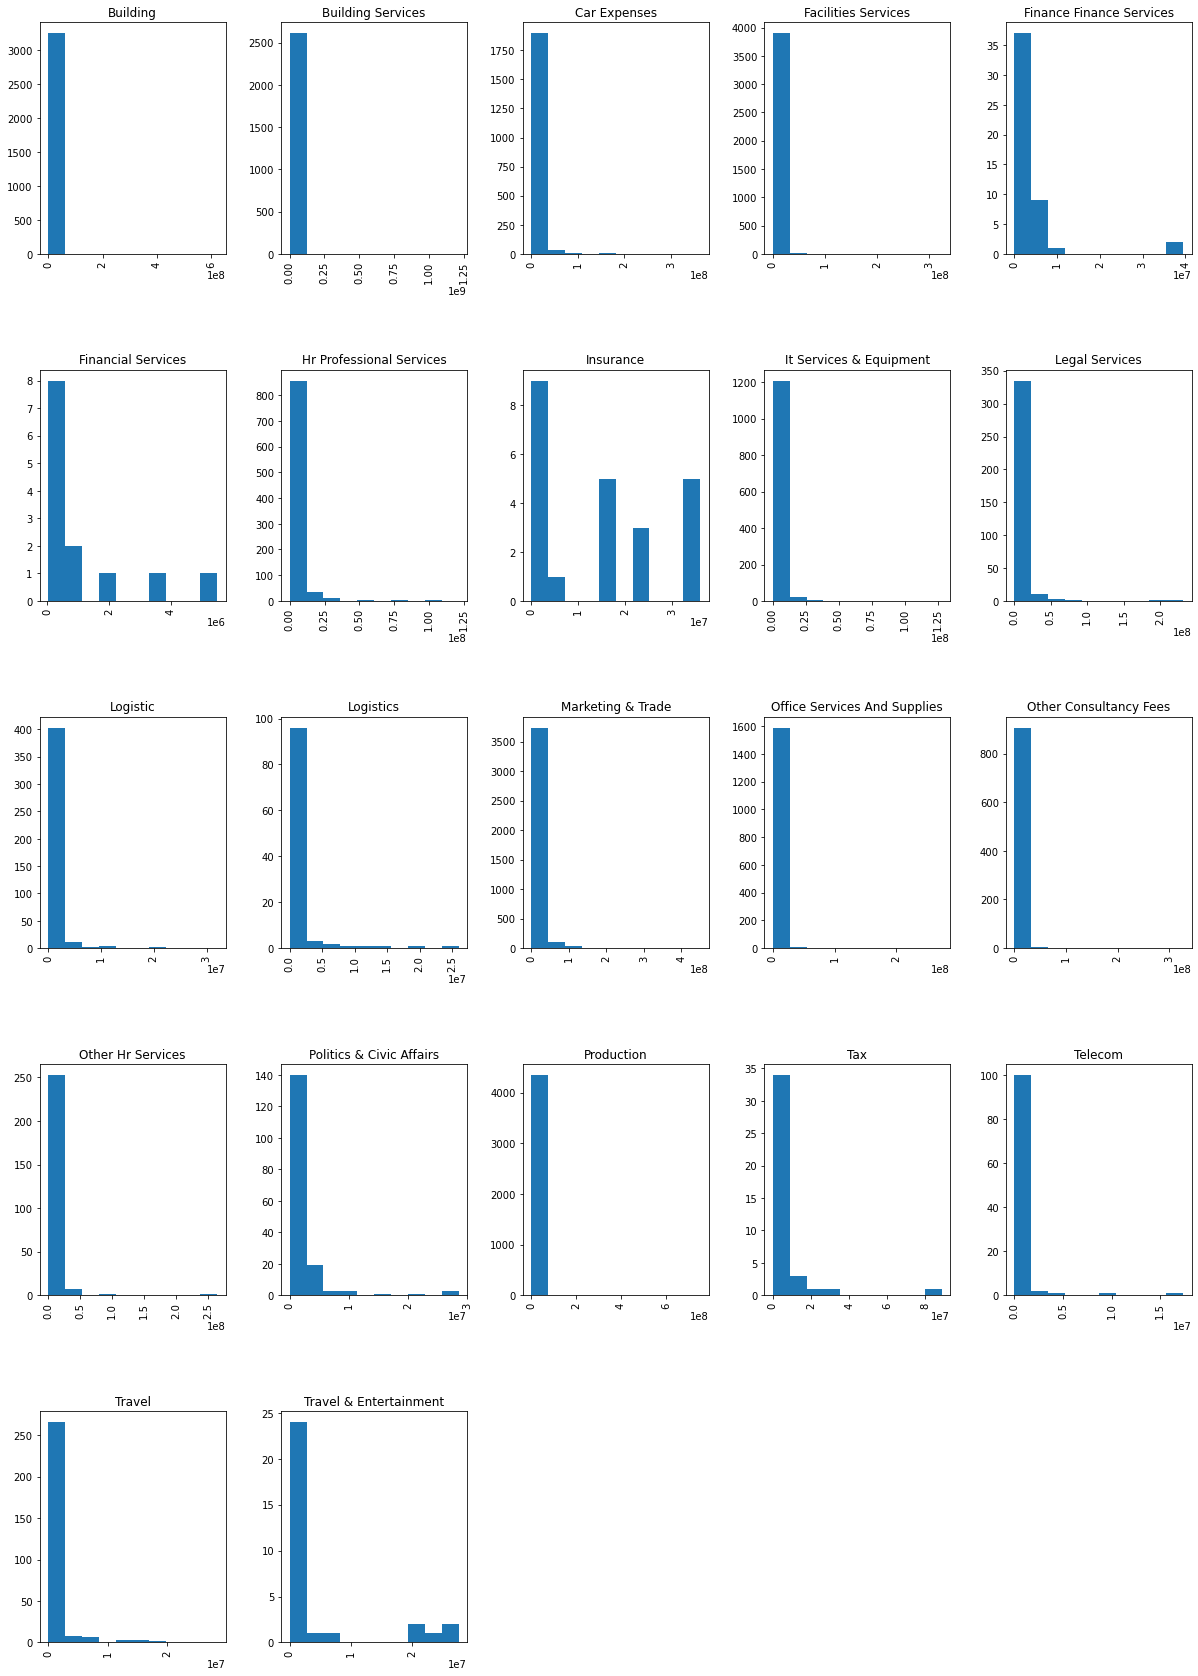

In [11]:
promnt.hist(by='Category',column = 'Estimated_Budget',figsize=(20,30))

1c THE CATEGORY WITH THE LOWEST ESTIMATED BUDGET

In [14]:
#then sort them in order from category with lowest budget to highest
Budget_by_cat.sort_values(ascending=True)

Category
Financial Services              1.408783e+07
Telecom                         6.191330e+07
Travel & Entertainment          1.392963e+08
Logistics                       1.505784e+08
Finance Finance Services        1.915399e+08
Tax                             2.112156e+08
Insurance                       3.572773e+08
Politics & Civic Affairs        3.579312e+08
Travel                          4.022841e+08
Logistic                        4.143157e+08
Other Hr Services               1.251217e+09
Legal Services                  1.886431e+09
It Services & Equipment         2.330005e+09
Office Services And Supplies    2.513403e+09
Hr Professional Services        3.038240e+09
Other Consultancy Fees          3.177844e+09
Production                      3.252505e+09
Building                        3.811453e+09
Car Expenses                    6.096997e+09
Facilities Services             6.301118e+09
Building Services               6.591663e+09
Marketing & Trade               2.639549e+10
N

In [15]:
#to check if that was right
Budget_by_cat.min()

14087830.0

In [16]:
print("Financial Services is the Category with the lowest budget of" + " " + str(value))

Financial Services is the Category with the lowest budget of 26395493350.03


<AxesSubplot:title={'center':'Estimated Budget Graph'}, xlabel='Category', ylabel='Estimated Budget'>

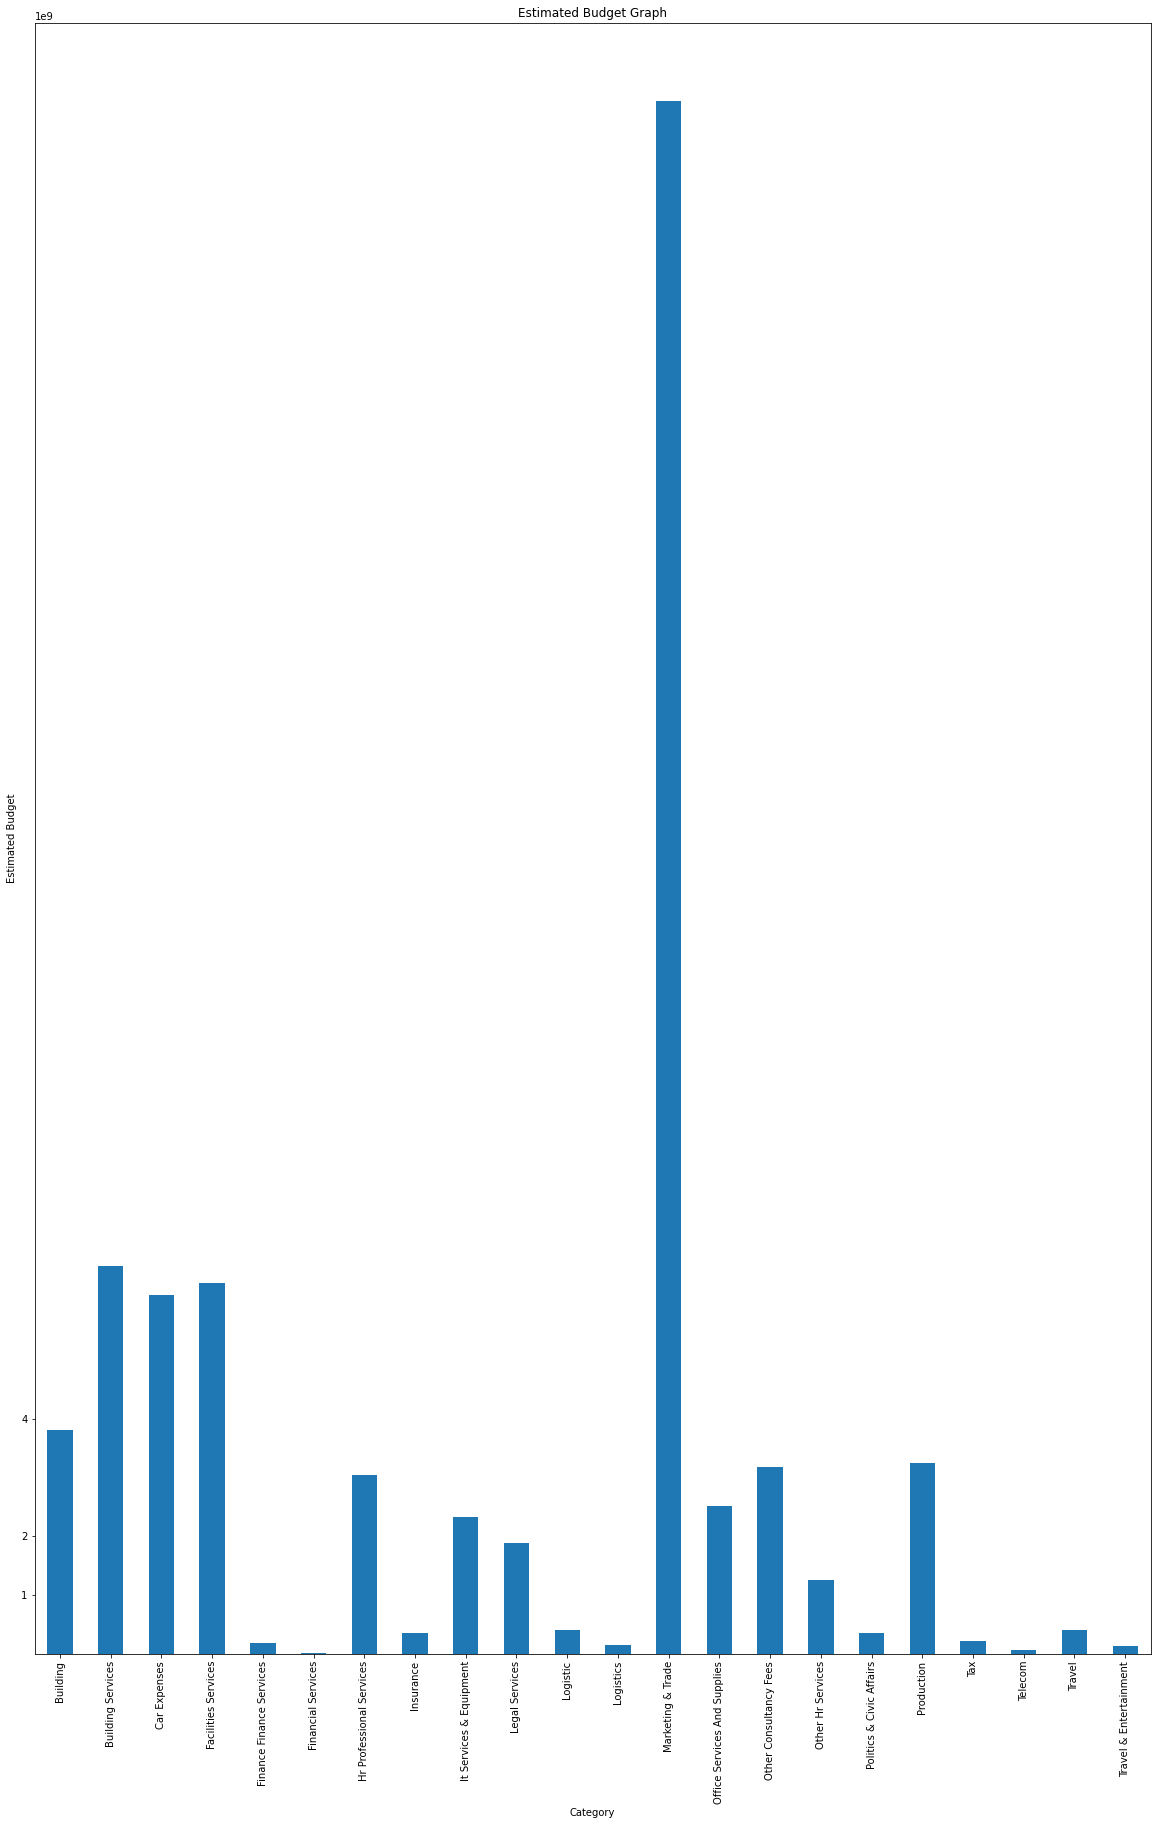

In [17]:
Budget_by_cat.plot(kind='bar',ylabel="Estimated Budget",title="Estimated Budget Graph", yticks=[1.0e+09,2.0e+09, 4.0e+09], figsize=(20,30))


1d. THE ORDER REQUEST WITH THE LARGEST ESTIMATED BUDGET 

In [19]:
Budget_by_order0=promnt.groupby(by=['Approval Date','Item Description']).agg({'Estimated_Budget':'sum'})
largest_order=Budget_by_order0.sort_values(by=["Estimated_Budget"],ascending=False)
order1=largest_order.iloc[0]
print("THE ORDER REQUEST WITH THE LARGEST ESTIMATED BUDGET IS :" + str(order1))

THE ORDER REQUEST WITH THE LARGEST ESTIMATED BUDGET IS :Estimated_Budget    1.214338e+09
Name: (10/17/2017, Tooling Kit For B&H Menthol Boost Pug Crest Rework), dtype: float64


# 2. Lead TIME KPI

In [5]:
#first I converted the order date and approval date to datetime
promnt['approval_time']=pd.to_datetime(promnt['Approval Date'])
promnt['Request_Date']=pd.to_datetime(promnt['Request Date'])

In [6]:
promnt.head()

,Request Date,RequestID,Requester Name,Approval Date,Activity Name,Category,Item Description,Justification,Suggest Vendor,Department,Country,Cost Centre,Line Manager,Budget Holder,PBM,Sourcing Manager,Current Status,Estimated_Budget,approval_time,Request_Date
0,11/30/2020,DDSS-BVUHR9,Mojeed Bello,12/15/2020,Modification And Installation Of Infeed Fbd Vi...,Production,1 No Modification And Installation Of Infeed F...,Modification And Installation Of Infeed Fbd Vi...,"Hajek,Peklak,Micoe,Fizer",PMD,Ibadan,NaN,Akezhi_Jo-Madugu,Ibukun_Dahunsi,Oluwadare_Adejoorin,Collete_Ogu,Approved,1000000.0,2020-12-15,2020-11-30
1,11/30/2020,DDSS-BVUG5R,Eunice Tangnjo Ndifor,2/18/2021,Complimentary Fourniture New Site Maoire Lineaire,Facilities Services,Single Cupbaord For Single Office,Single Cupboard For Office,Ste Camci,Marketing,Cameroon,NaN,Junior_Mutoke,Junior_Mutoke,Oluwadare_Adejoorin,Lou-Andreas_Rigondja,Awaiting Approval,180000.0,2021-02-18,2020-11-30
2,11/30/2020,DDSS-BVUCYB,Eunice Tangnjo Ndifor,11/29/2020,Splits For The Chill Out Room,Facilities Services,Purchase Of 2 New Splits Of 3 Ac To 6Cv For T...,Purchase Of Splits For Chill Out Room New Office,Procurement To Source,Facilities,Cameroon,CMCACB0A01-FACILITIES,Junior_Mutoke,Daniele_Enganeben,Oluwadare_Adejoorin,Lou-Andreas_Rigondja,Awaiting Approval,21017909.0,2020-11-29,2020-11-30
3,11/30/2020,DDSS-BVUCF5,Eunice Tangnjo Ndifor,11/30/2020,Cameroon Office Remodeling Office Equipement,Facilities Services,Office Materials Iron Shevles And Cupboard,Complimentary Office Equipement - Wbs Xcmcac.L...,Ste Camci,Marketing,Cameroon,CMCA2E1E01-TM&D OFF-DISTRIBUTN,Junior_Mutoke,Junior_Mutoke,Oluwadare_Adejoorin,Lou-Andreas_Rigondja,Awaiting Approval,1300000.0,2020-11-30,2020-11-30
4,11/26/2020,DDSS-BVQMK5,Myrrha Akina,11/26/2020,Dks Lights Relaunch In Gabon,Marketing & Trade,Mini Transistors,Mini Transistors For Retailer'S Incentive For ...,Tba,Marketing,Gabon,GACA2D1A00 - BRAND MKTG-FUNCT MGT,Lesly_Noundja,Victoria_Olorunfemi,Oluwadare_Adejoorin,Lou-Andreas_Rigondja,Approved,640000.0,2020-11-26,2020-11-26


In [19]:
# then create a column called lead time which subtracts the two datetimes
from datetime import datetime
date2=np.array([promnt['approval_time']])
date1=np.array([promnt['Request_Date']])
promnt['lead_time']=(date2-date1)/np.timedelta64(1,'D')
promnt['lead_time']=promnt['lead_time'].astype(int)
promnt.head()

ValueError: Length of values (1) does not match length of index (26486)

# 3. order request frequency KPI

In [ ]:
Budget_by_order1=promnt.groupby(by=['Department','Country']).agg({'Approval Date':'sum'})